<h2>Angewandte Künstliche Intelligenz (<b>ANN</b>)</h2>

<table>
    <tr>
        <th>Matrikelnummer</th>
        <th>Name</th>
    </tr>
    <tr>
        <td>762476</td>
        <td>Simon Heiß</td>
    </tr>
</table>

<h4>Aufgaben:</h4>
<p>Code aus Foliensatz in eigene Notebook übernehmen (muss Funktionieren)</p>

<li>Code soll sehr ausführlich kommentiert werden</li>
<li>Neue Befehle sollten als Kommentar erklärt werden (Eigene Worte nutzen)</li>
<li>Fachbegriffe/Methoden sollten kurz erläutert werden</li>


In [96]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt


In [97]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        # Definition der Linear Transformationsschichten
        self.fc1 = nn.Linear(in_features, h1)  # Eingabeschicht -> Versteckte Schicht 1
        self.fc2 = nn.Linear(h1, h2)  # Versteckte Schicht 1 -> Versteckte Schicht 2
        self.out = nn.Linear(h2, out_features)  # Versteckte Schicht 2 -> Ausgabeschicht

    def forward(self, x):
        # Vorwärtsdurchlauf der Eingabe durch das Netzwerk
        x = F.relu(self.fc1(x))  # Anwendung der ReLU-Aktivierungsfunktion auf die erste versteckte Schicht
        x = F.relu(self.fc2(x))  # Anwendung der ReLU-Aktivierungsfunktion auf die zweite versteckte Schicht
        x = self.out(x)  # Ausgabe der letzten Schicht ohne Aktivierungsfunktion
        return x

torch.manual_seed(32)  # Setzen des Zufallssamen für reproduzierbare Ergebnisse

model = Model()  # Erstellen einer Instanz des Modells


In [98]:
df = pd.read_csv("./iris.csv")
df.head()#Zeigt die oberen 5 Zeilen des Datensatzes an

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


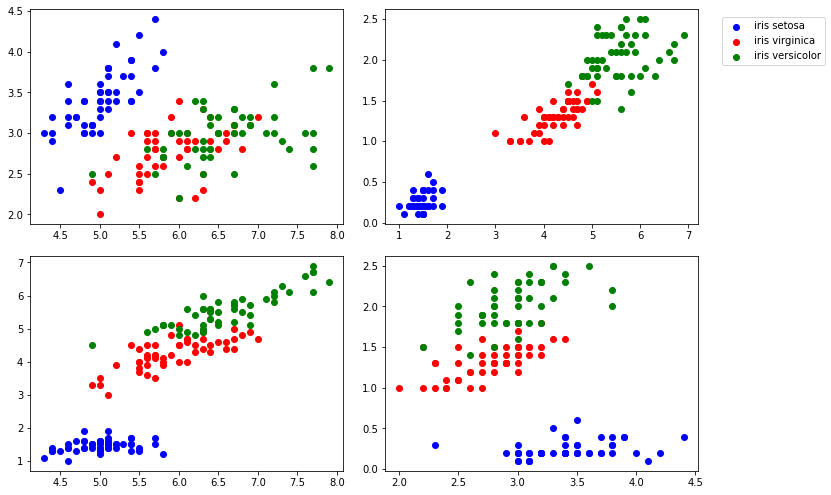

In [99]:
import matplotlib.pyplot as plt

# Erstellt eine Figur mit 2x2 Unterteilungen und legt die Größe auf 10x7 Zoll fest
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# Passt den Layout der Subplots an, um Platz für Achsentitel und Legenden zu machen
fig.tight_layout()

# Liste der Plot-Indizes, die die Kombinationen der Subplots angeben
plots = [(0, 1), (2, 3), (0, 2), (1, 3)]

# Liste der Farben für die verschiedenen Klassen
colors = ['b', 'r', 'g']

# Liste der Beschriftungen für die verschiedenen Klassen
labels = ['iris setosa', 'iris virginica', 'iris versicolor']

# Schleife über die Flattened-Achsen (alle Subplots)
for i, ax in enumerate(axes.flat):
    # Schleife über die verschiedenen Klassen (0, 1, 2)
    for j in range(3):
        # Die Spaltenindizes der Daten für die x- und y-Achse
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        
        # Scatter-Plot der Datenpunkte der jeweiligen Klasse mit den entsprechenden Farben
        ax.scatter(df[df['target'] == j][x], df[df['target'] == j][y], color=colors[j])

# Fügt eine Legende zur Figur hinzu
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1, 0.85))


In [100]:
# X enthält die Eingabedaten, die Spalte 'target' wird aus dem Dataframe entfernt
X = df.drop('target', axis=1).values

# y enthält die Zielvariablen (Klassenlabels)
y = df['target'].values

# Die Funktion train_test_split aus Scikit-learn wird verwendet, um die Daten in Trainings- und Testsets aufzuteilen
# test_size=0.2 gibt den Anteil der Testdaten an (hier 20%)
# random_state=33 setzt den Zufallssamen für die Reproduzierbarkeit der Aufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Die Eingabedaten werden in Torch FloatTensoren konvertiert
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Die Zielvariablen werden in Torch LongTensoren konvertiert
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [101]:
# trainloader wird erstellt und enthält die Trainingsdaten
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

# testloader wird erstellt und enthält die Testdaten
testloader = DataLoader(X_test, batch_size=60, shuffle=False)


In [102]:
torch.manual_seed(4)  # Setzen des Zufallssamens für reproduzierbare Ergebnisse

model = Model()  # Instanziierung des Modells

criterion = nn.CrossEntropyLoss()  # Definieren des Verlustkriteriums (Loss)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Festlegen des Optimierers


In [103]:
epochs = 100  # Anzahl der Epochen (Durchläufe über den gesamten Trainingsdatensatz)
losses = []  # Eine Liste, um die Verluste (Losses) pro Epoche zu speichern

for i in range(epochs):
    i += 1  # Erhöhen des Epoche-Zählers um 1
    
    # Vorwärtsdurchlauf (Forward Pass) des Modells mit den Trainingsdaten
    y_pred = model.forward(X_train)
    
    # Berechnung des Verlusts (Loss) zwischen den vorhergesagten Klassen und den tatsächlichen Klassen
    loss = criterion(y_pred, y_train)
    
    # Hinzufügen des aktuellen Verlusts zur Liste der Verluste
    losses.append(loss.detach().numpy())
    
    if i % 10 == 1:
        # Ausgabe der aktuellen Epoche und des Verlusts (Loss)
        print(f'epoch:{i:2} loss: {loss.item():10.8f}')
    
    # Zurücksetzen der Gradienten des Optimierers auf Null
    optimizer.zero_grad()
    
    # Berechnung der Gradienten des Verlusts bezüglich der Modellparameter
    loss.backward()
    
    # Aktualisierung der Modellparameter basierend auf den Gradienten
    optimizer.step()


epoch: 1 loss: 1.09568226
epoch:11 loss: 0.98190629
epoch:21 loss: 0.75652379
epoch:31 loss: 0.49447367
epoch:41 loss: 0.34981725
epoch:51 loss: 0.22807980
epoch:61 loss: 0.13547555
epoch:71 loss: 0.09162237
epoch:81 loss: 0.07378435
epoch:91 loss: 0.06546316


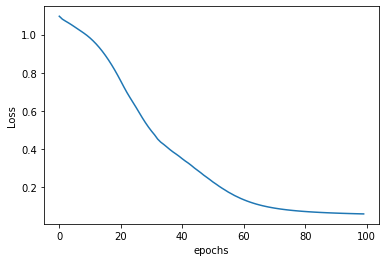

In [104]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel('epochs');

In [106]:
plt.plot(range(epochs), losses)  # Plot der Verluste über die Epochen
plt.ylabel("Loss")  # Beschriftung der y-Achse als "Loss"
plt.xlabel('epochs')  # Beschriftung der x-Achse als "epochs"

0.06247772


In [107]:
correct = 0  # Zähler für die Anzahl der korrekten Vorhersagen

with torch.no_grad():
    for i, data in enumerate(X_test):
        # Vorwärtsdurchlauf (Forward Pass) des Modells mit einem Datenpunkt aus den Testdaten
        y_val = model.forward(data.float())
        
        # Ausgabe der Vorhersage und des tatsächlichen Werts für den Datenpunkt
        print(f'{i+1:2}. {str(y_val):38} {y_test[i]}')
        
        # Überprüfung, ob die Vorhersage korrekt ist
        if y_val.argmax().item() == y_test[i]:
            correct += 1  # Inkrementieren des Zählers für korrekte Vorhersagen

    # Ausgabe der Anzahl der korrekten Vorhersagen und der Genauigkeit in Prozent
    print(f'{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')


 1. tensor([-0.3360,  7.3629,  1.3780])    1
 2. tensor([0.2770, 8.1552, 0.4267])       1
 3. tensor([ 11.9968,   6.1842, -19.1980]) 0
 4. tensor([-2.0192,  7.9662,  4.2445])    1
 5. tensor([-6.1353,  7.9516, 11.0908])    2
 6. tensor([-10.2640,   8.3102,  17.9992]) 2
 7. tensor([ 12.0541,   6.4316, -19.2913]) 0
 8. tensor([ 12.9496,   6.4815, -20.7530]) 0
 9. tensor([-5.7727,  8.2435, 10.5079])    2
10. tensor([-7.8872,  8.6126, 14.0726])    2
11. tensor([-8.7060,  8.6074, 15.4331])    2
12. tensor([ 11.6348,   5.8164, -18.6210]) 0
13. tensor([-8.1013,  8.2331, 14.3883])    2
14. tensor([-2.0796,  7.7751,  4.3185])    1
15. tensor([-6.0833,  8.3916, 11.0582])    2
16. tensor([0.1354, 7.8658, 0.6407])       1
17. tensor([-4.0880,  7.7216,  7.6638])    2
18. tensor([ 13.1511,   6.5907, -21.0787]) 0
19. tensor([-1.5649,  8.0220,  3.4751])    1
20. tensor([-6.2865,  8.9727, 11.4244])    2
21. tensor([ 12.3848,   6.2568, -19.8265]) 0
22. tensor([ 13.8199,   7.0854, -22.1532]) 0
23. tensor

In [108]:
torch.save(model.state_dict(), "IrisDatasetModel.pt")  # Speichern der Modellparameter

newModel = Model()  # Instanziierung eines neuen Modells
newModel.load_state_dict(torch.load("IrisDatasetModel.pt"))  # Laden der Modellparameter
newModel.eval()  # Setzen des Modus des Modells auf Evaluation (kein Training)


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [109]:
with torch.no_grad():
    y_val = newModel.forward(X_test.float())  # Durchführung einer Vorhersage mit dem geladenen Modell auf den Testdaten
    loss = criterion(y_val, y_test)  # Berechnung des Verlusts (Loss) für die Vorhersagen
    print(f'{loss:.9f}')  # Ausgabe des Verlustwerts auf der Konsole


0.062477715


In [110]:
mysteryIris = torch.tensor([5.6,3.7,2.2,0.5])  

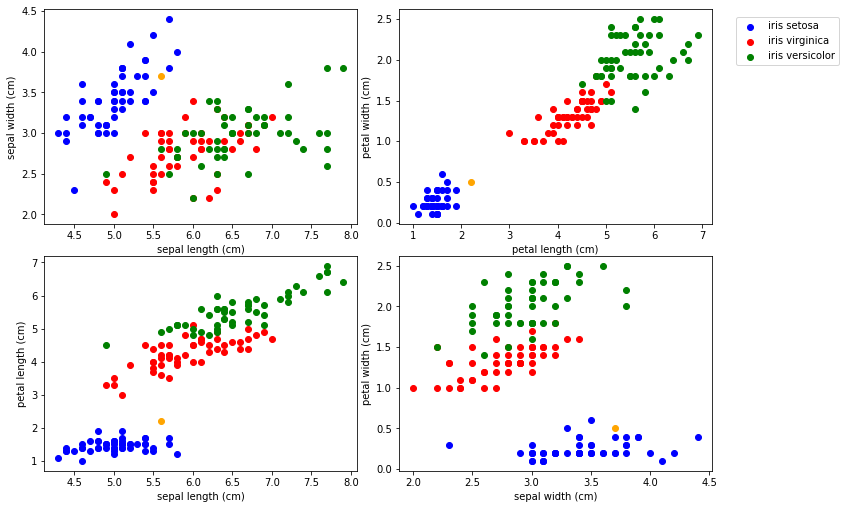

In [116]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize =(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b','r','g']
labels = ['iris setosa','iris virginica','iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter( df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

    ax.scatter(mysteryIris[plots[i][0]], mysteryIris[plots[i][1]], color="orange")
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1,0.85))

In [118]:
with torch.no_grad():
    print(mysteryIris)  # Ausgabe des unbekannten Iris-Datenmusters
    print(newModel(mysteryIris))  # Durchführung einer Vorhersage mit dem geladenen Modell auf dem unbekannten Datenmuster
    print(labels[newModel(mysteryIris).argmax()])  # Ausgabe des vorhergesagten Labels basierend auf der Vorhersage des Modells


tensor([5.6000, 3.7000, 2.2000, 0.5000])
tensor([ 12.2112,   7.1279, -19.5248])
iris setosa
